In [2]:
import pandas as pd
import glob
import os

bb_data_path = '../Data/Beyond Blue/'

posts_files = glob.glob(os.path.join(bb_data_path, 'posts_*.csv'))
comments_files = glob.glob(os.path.join(bb_data_path, 'comments_*.csv'))

bb_posts = pd.concat([pd.read_csv(f) for f in posts_files], ignore_index=True)
bb_comments = pd.concat([pd.read_csv(f) for f in comments_files], ignore_index=True)

print("Posts shape:", bb_posts.shape)
print("Comments shape:", bb_comments.shape)
print(bb_posts.head())
print(bb_comments.head())

Posts shape: (20003, 9)
Comments shape: (10155, 8)
   Post ID Category                              Post Title  \
0   555887  Anxiety            muscle tension crying relief   
1   555887  Anxiety            muscle tension crying relief   
2   581593  Anxiety                           burnout & gad   
3   581558  Anxiety                   dreading the new year   
4   581626  Anxiety  should i consider getting a therapist?   

                            Post Author   Post Date  \
0                               Johnny_  01-01-2023   
1                               Johnny_  01-01-2023   
2  More than my mental health condition  01-01-2024   
3                                 K-J-S  01-01-2024   
4              burntlibraryofalexandria  01-01-2024   

                                        Post Content  Support Count  \
0  hello everyone, happy new year!im hoping someo...              0   
1  hello everyone, happy new year!im hoping someo...              0   
2  i feel like i need some

In [3]:
print("Number of posts:", len(bb_posts))
print("Number of comments:", len(bb_comments))

Number of posts: 20003
Number of comments: 10155


In [4]:
print("Posts shape:", bb_posts.shape)
print("Comments shape:", bb_comments.shape)

Posts shape: (20003, 9)
Comments shape: (10155, 8)


In [8]:
print("Columns in bb_posts:", bb_posts.columns.tolist())
print("Columns in bb_comments:", bb_comments.columns.tolist())

Columns in bb_posts: ['Post ID', 'Category', 'Post Title', 'Post Author', 'Post Date', 'Post Content', 'Support Count', 'Total Number of Comments', 'Post URL']
Columns in bb_comments: ['Comment ID', 'Post ID', 'Category', 'Comment Author', 'Comment Date', 'Comment Content', 'Comment Support', 'Post URL']


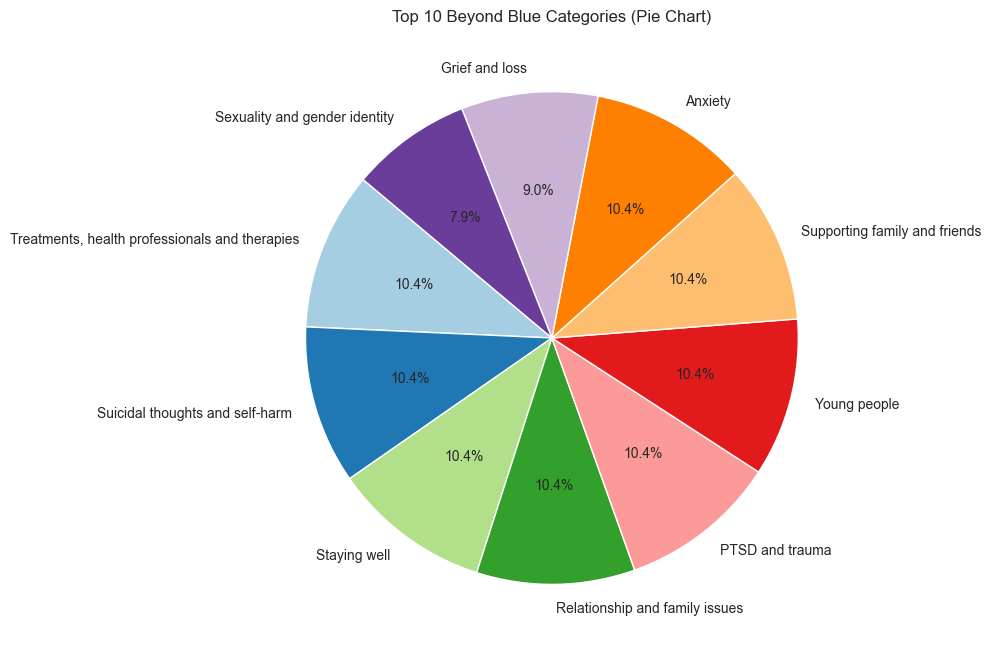

In [7]:
import matplotlib.pyplot as plt

# For Beyond Blue Categories
top_categories = bb_posts['Category'].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Beyond Blue Categories (Pie Chart)')
plt.show()

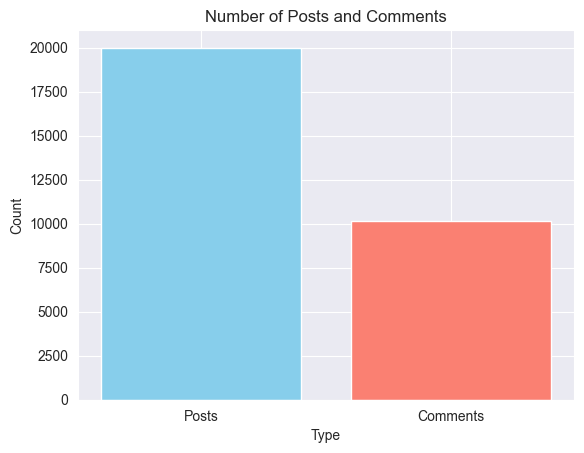

In [3]:
import matplotlib.pyplot as plt

# Data to plot
counts = [len(bb_posts), len(bb_comments)]
labels = ['Posts', 'Comments']

# Create bar chart
plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.title('Number of Posts and Comments')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()

In [14]:
# Reddit
reddit_posts_before_count = len(reddit_posts)
reddit_comments_before_count = len(reddit_comments)

NameError: name 'reddit_posts' is not defined

In [8]:
# Check for duplicate post IDs
duplicate_post_ids = bb_posts['Post ID'].duplicated().sum()
print(f"Duplicate post IDs: {duplicate_post_ids}")

# Check for duplicate comment IDs
duplicate_comment_ids = bb_comments['Comment ID'].duplicated().sum()
print(f"Duplicate comment IDs: {duplicate_comment_ids}")

# Remove duplicates and reset index
bb_posts = bb_posts.drop_duplicates(subset=['Post ID']).reset_index(drop=True)
bb_comments = bb_comments.drop_duplicates(subset=['Comment ID']).reset_index(drop=True)
print("Posts after removing duplicates:", len(bb_posts))
print("Comments after removing duplicates:", len(bb_comments))

Duplicate post IDs: 9848
Duplicate comment IDs: 0
Posts after removing duplicates: 10155
Comments after removing duplicates: 10155


In [9]:
# For posts
empty_posts = bb_posts['Post Content'].str.strip() == ''
short_posts = bb_posts['Post Content'].str.len() < 10
print(f"Empty posts: {empty_posts.sum()}")
print(f"Very short posts (<10 chars): {short_posts.sum()}")

# For comments
empty_comments = bb_comments['Comment Content'].str.strip() == ''
short_comments = bb_comments['Comment Content'].str.len() < 10
print(f"Empty comments: {empty_comments.sum()}")
print(f"Very short comments (<10 chars): {short_comments.sum()}")

Empty posts: 0
Very short posts (<10 chars): 0
Empty comments: 0
Very short comments (<10 chars): 8


In [10]:
posts_empty = bb_posts['Post Content'].str.strip().str.len() <= 10
comments_empty = bb_comments['Comment Content'].str.strip().str.len() <= 10
print(f"Posts to remove (empty/short): {posts_empty.sum()}")
print(f"Comments to remove (empty/short): {comments_empty.sum()}")

bb_posts = bb_posts[~posts_empty].reset_index(drop=True)
bb_comments = bb_comments[~comments_empty].reset_index(drop=True)
print("Posts shape after removing short/empty:", bb_posts.shape)
print("Comments shape after removing short/empty:", bb_comments.shape)

Posts to remove (empty/short): 0
Comments to remove (empty/short): 9
Posts shape after removing short/empty: (10155, 9)
Comments shape after removing short/empty: (10146, 8)


In [11]:
# Check for null values
print("Posts nulls:\n", bb_posts.isnull().sum())
print("Comments nulls:\n", bb_comments.isnull().sum())

# Check for duplicate IDs again (should be zero)
print("Posts duplicate IDs:", bb_posts.duplicated(subset=['Post ID']).sum())
print("Comments duplicate IDs:", bb_comments.duplicated(subset=['Comment ID']).sum())

# Check for '[deleted]' or '[removed]' content
print("Posts with '[deleted]' or '[removed]':", bb_posts['Post Content'].isin(['[deleted]', '[removed]']).sum())
print("Comments with '[deleted]' or '[removed]':", bb_comments['Comment Content'].isin(['[deleted]', '[removed]']).sum())

# Show sample cleaned posts and comments
print("Sample cleaned posts:\n", bb_posts['Post Content'].sample(3))
print("Sample cleaned comments:\n", bb_comments['Comment Content'].sample(3))

Posts nulls:
 Post ID                     0
Category                    0
Post Title                  0
Post Author                 0
Post Date                   0
Post Content                0
Support Count               0
Total Number of Comments    0
Post URL                    0
dtype: int64
Comments nulls:
 Comment ID         0
Post ID            0
Category           0
Comment Author     0
Comment Date       0
Comment Content    1
Comment Support    0
Post URL           0
dtype: int64
Posts duplicate IDs: 0
Comments duplicate IDs: 0
Posts with '[deleted]' or '[removed]': 0
Comments with '[deleted]' or '[removed]': 0
Sample cleaned posts:
 8989    hi everyone,i’m a uni student with exams in ab...
1489    hi there.my little nephew passed away this wee...
6678    i harmed myself for the first time in around a...
Name: Post Content, dtype: object
Sample cleaned comments:
 3758    i’m 19 and after years of witnessing my dad ve...
9105    curious to see what course others have taken w..

In [12]:
import re
import html

def advanced_clean(text):
    text = str(text).lower().strip()
    text = html.unescape(text)
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\*\*(.*?)\*\*|\*(.*?)\*', '', text)  # Remove markdown bold/italic
    text = re.sub(r'\[(.*?)\]\(.*?\)', '', text)  # Remove markdown links
    text = re.sub(r'!?\[(.*?)\]\(.*?\)', '', text)  # Remove image markdown
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'(.)\1{3,}', r'\1\1', text)  # Limit excessive repeated chars
    text = re.sub(r'!{2,}', '!', text)  # Limit exclamation marks
    text = re.sub(r'[^a-z0-9\s.,!?]', '', text)  # Remove special chars except basic punctuation
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    return text

# Apply to posts and comments
bb_posts['Post Content'] = bb_posts['Post Content'].apply(advanced_clean)
bb_comments['Comment Content'] = bb_comments['Comment Content'].apply(advanced_clean)

# Show samples after advanced cleaning
print("Sample posts after advanced cleaning:\n", bb_posts['Post Content'].sample(3))
print("Sample comments after advanced cleaning:\n", bb_comments['Comment Content'].sample(3))

Sample posts after advanced cleaning:
 4861    i posted somewhere here about a year ago... ab...
6595    i talked to a person on the hotline but i feel...
8441    i cant find the answer. im not talking about r...
Name: Post Content, dtype: object
Sample comments after advanced cleaning:
 2593    12 months ago rememberance day a day i will re...
2163    sometimes its good to do things a bit differen...
3804    husband is heavy drinker and l can see him get...
Name: Comment Content, dtype: object


In [16]:
bb_posts.to_csv('bb_posts_clean_final.csv', index=False)
bb_comments.to_csv('bb_comments_clean_final.csv', index=False)
print("Saved cleaned posts and comments to CSV.")

Saved cleaned posts and comments to CSV.


# EDA

In [16]:
import pandas as pd

# Load cleaned data
bb_posts = pd.read_csv("bb_posts_clean_final.csv")
bb_comments = pd.read_csv("bb_comments_clean_final.csv")

print(f"Total posts: {len(bb_posts)}")
print(f"Total comments: {len(bb_comments)}")
print("Posts columns:", bb_posts.columns.tolist())
print("Comments columns:", bb_comments.columns.tolist())
print("Sample posts:\n", bb_posts.head())
print("Sample comments:\n", bb_comments.head())

Total posts: 10155
Total comments: 10146
Posts columns: ['Post ID', 'Category', 'Post Title', 'Post Author', 'Post Date', 'Post Content', 'Support Count', 'Total Number of Comments', 'Post URL']
Comments columns: ['Comment ID', 'Post ID', 'Category', 'Comment Author', 'Comment Date', 'Comment Content', 'Comment Support', 'Post URL']
Sample posts:
    Post ID Category                              Post Title  \
0   555887  Anxiety            muscle tension crying relief   
1   581593  Anxiety                           burnout & gad   
2   581558  Anxiety                   dreading the new year   
3   581626  Anxiety  should i consider getting a therapist?   
4   581561  Anxiety                       passive agression   

                            Post Author   Post Date  \
0                               Johnny_  01-01-2023   
1  More than my mental health condition  01-01-2024   
2                                 K-J-S  01-01-2024   
3              burntlibraryofalexandria  01-01-2024

In [18]:
print(bb_posts.columns.tolist())

['Post ID', 'Category', 'Post Title', 'Post Author', 'Post Date', 'Post Content', 'Support Count', 'Total Number of Comments', 'Post URL']


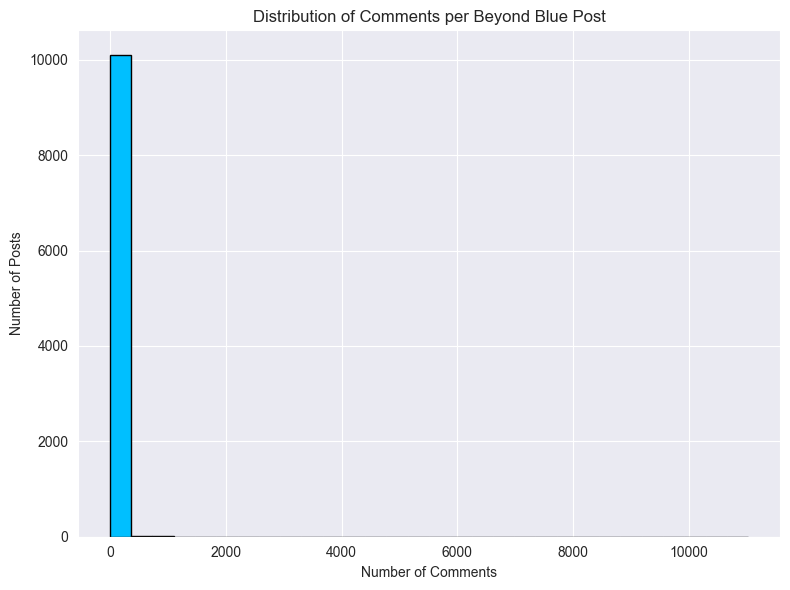

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(bb_posts['Total Number of Comments'], bins=30, color='deepskyblue', edgecolor='black')
plt.title('Distribution of Comments per Beyond Blue Post')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()

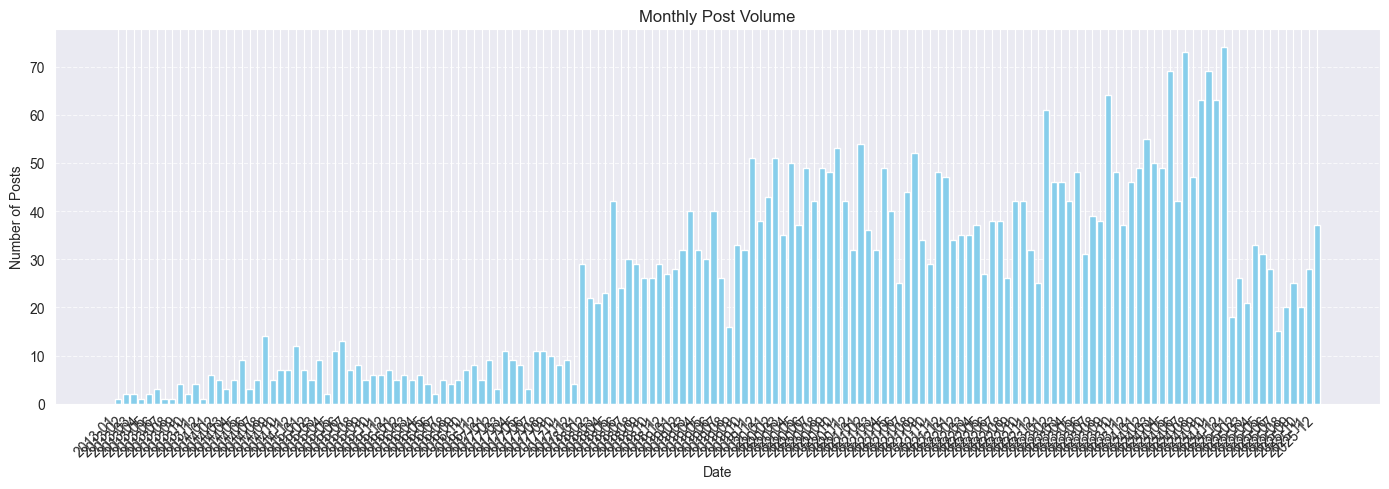

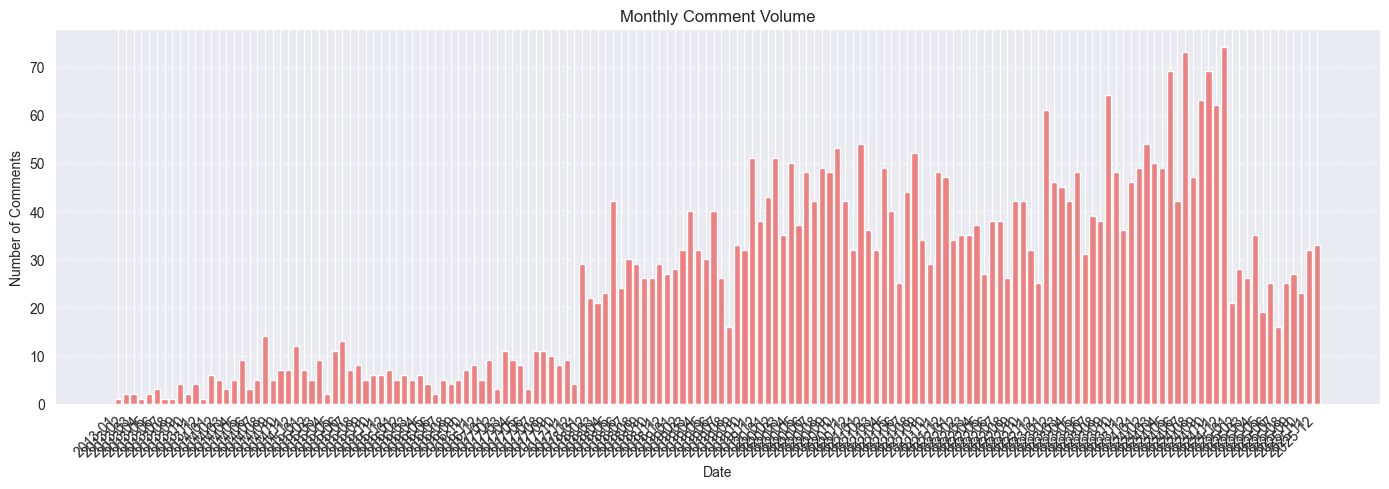

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date columns are datetime
bb_posts['Post Date'] = pd.to_datetime(bb_posts['Post Date'], errors='coerce', dayfirst=False)
bb_comments['Comment Date'] = pd.to_datetime(bb_comments['Comment Date'], errors='coerce', dayfirst=False)

# Group by month
posts_monthly = bb_posts.groupby(bb_posts['Post Date'].dt.to_period('M')).size()
comments_monthly = bb_comments.groupby(bb_comments['Comment Date'].dt.to_period('M')).size()

# Plot: Monthly Post Volume
plt.figure(figsize=(14,5))
plt.bar(posts_monthly.index.astype(str), posts_monthly.values, color='skyblue')
plt.title('Monthly Post Volume')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot: Monthly Comment Volume
plt.figure(figsize=(14,5))
plt.bar(comments_monthly.index.astype(str), comments_monthly.values, color='lightcoral')
plt.title('Monthly Comment Volume')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

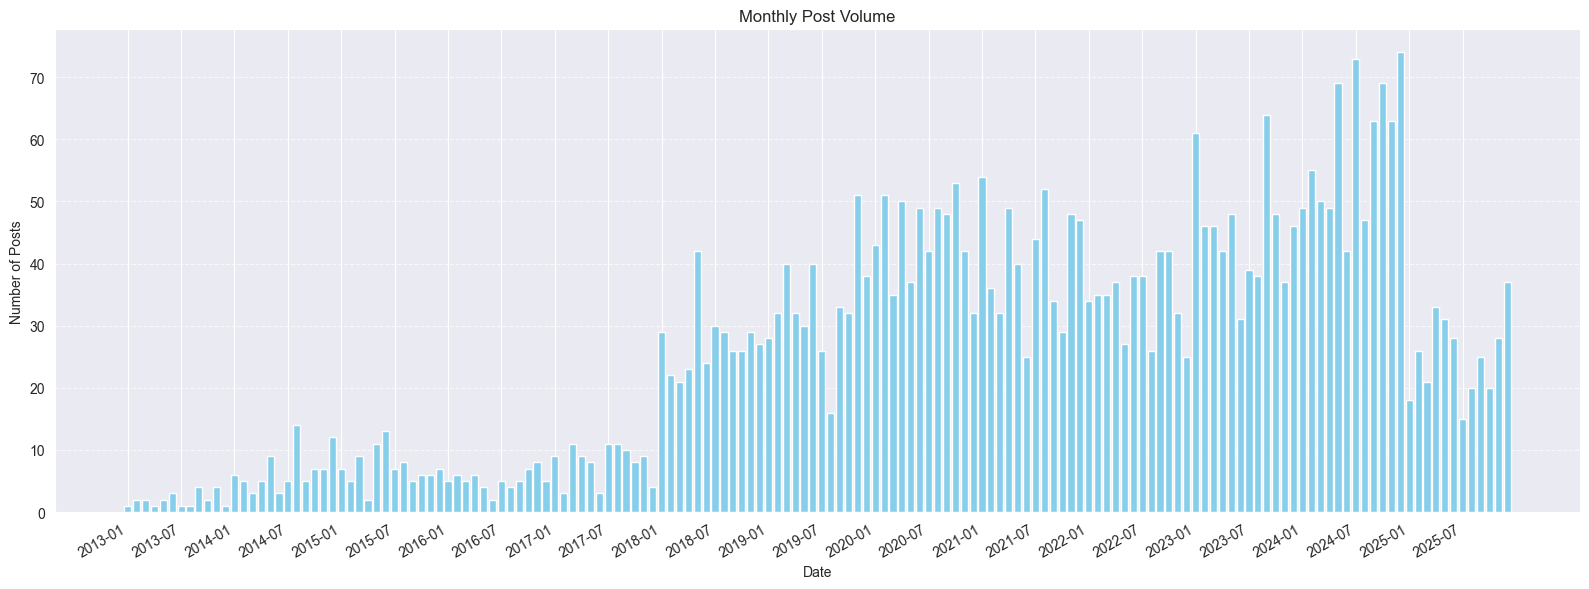

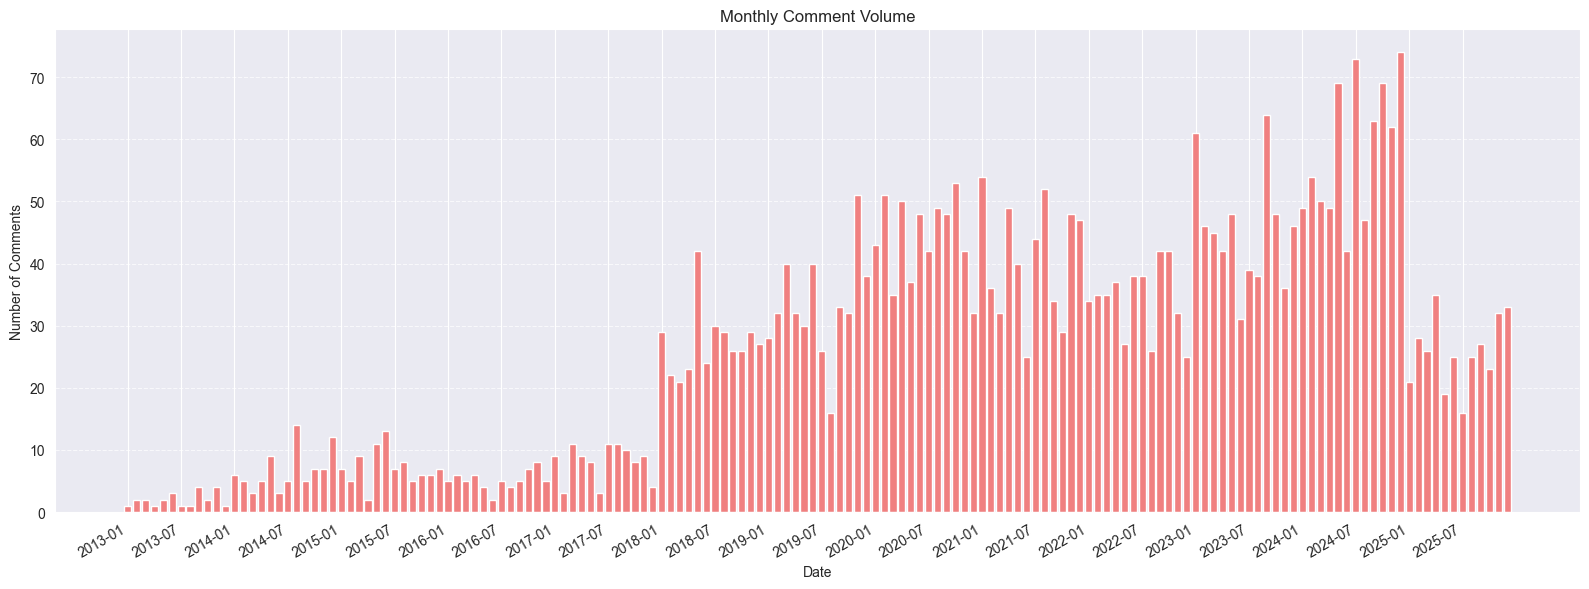

In [19]:
import matplotlib.pyplot as plt

def plot_monthly_volume(monthly_counts, title, ylabel, color):
    plt.figure(figsize=(16,6))
    # Convert PeriodIndex to string for plotting
    x = monthly_counts.index.astype(str)
    y = monthly_counts.values

    plt.bar(x, y, color=color)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)

    # Show only every 6th tick to avoid overlap
    step = 6 if len(x) > 30 else 1
    plt.xticks(range(0, len(x), step), [x[i] for i in range(0, len(x), step)], rotation=30, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Usage:
plot_monthly_volume(posts_monthly, 'Monthly Post Volume', 'Number of Posts', 'skyblue')
plot_monthly_volume(comments_monthly, 'Monthly Comment Volume', 'Number of Comments', 'lightcoral')

C:\Users\aipro\AppData\Local\Temp\ipykernel_10232\196073043.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_post_cats.values, y=top_post_cats.index, palette="Blues_d")


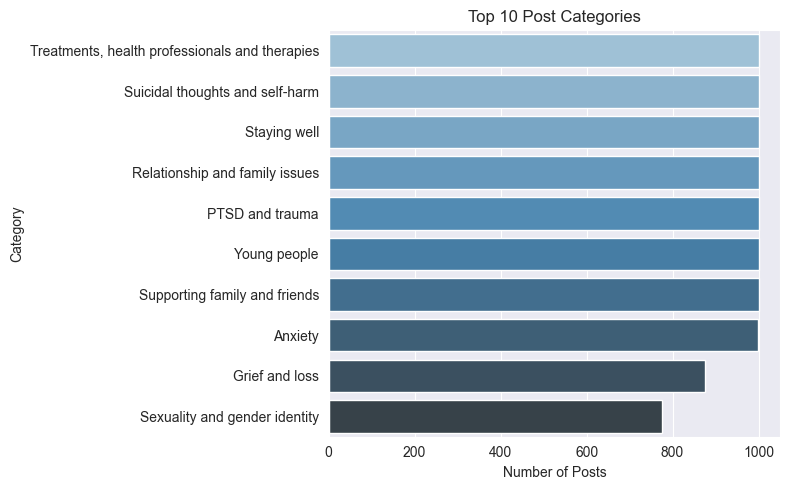

C:\Users\aipro\AppData\Local\Temp\ipykernel_10232\196073043.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_comment_cats.values, y=top_comment_cats.index, palette="Reds_d")


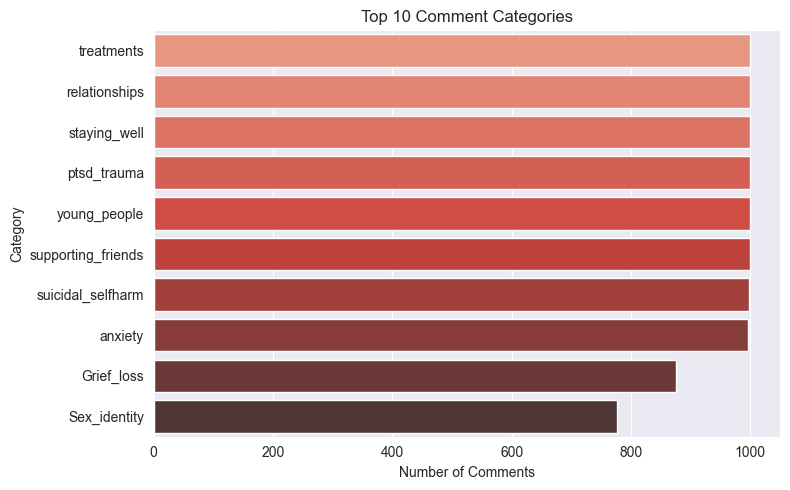

In [21]:
import seaborn as sns

# Top post categories
top_post_cats = bb_posts['Category'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_post_cats.values, y=top_post_cats.index, palette="Blues_d")
plt.title("Top 10 Post Categories")
plt.xlabel("Number of Posts")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# Top comment categories
top_comment_cats = bb_comments['Category'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_comment_cats.values, y=top_comment_cats.index, palette="Reds_d")
plt.title("Top 10 Comment Categories")
plt.xlabel("Number of Comments")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [22]:
# Top post authors
top_post_authors = bb_posts['Post Author'].value_counts().head(10)
print("Top Post Authors:\n", top_post_authors)

# Top comment authors
top_comment_authors = bb_comments['Comment Author'].value_counts().head(10)
print("Top Comment Authors:\n", top_comment_authors)

Top Post Authors:
 Post Author
white knight      174
Donte              94
Paul               27
Eagle Ray          25
Gruffudd           24
Elephant86         23
quirkywords        20
Soberlicious96     19
Earth Girl         18
blondguy           17
Name: count, dtype: int64
Top Comment Authors:
 Comment Author
white knight      174
Donte              94
Paul               27
Eagle Ray          25
Gruffudd           24
Elephant86         23
quirkywords        20
Soberlicious96     19
Earth Girl         18
blondguy           17
Name: count, dtype: int64


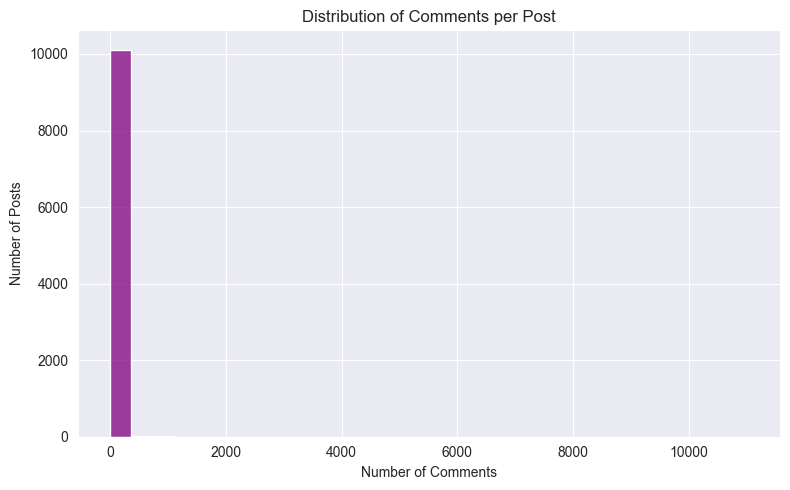

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(bb_posts['Total Number of Comments'], bins=30, kde=False, color='purple')
plt.title("Distribution of Comments per Post")
plt.xlabel("Number of Comments")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()

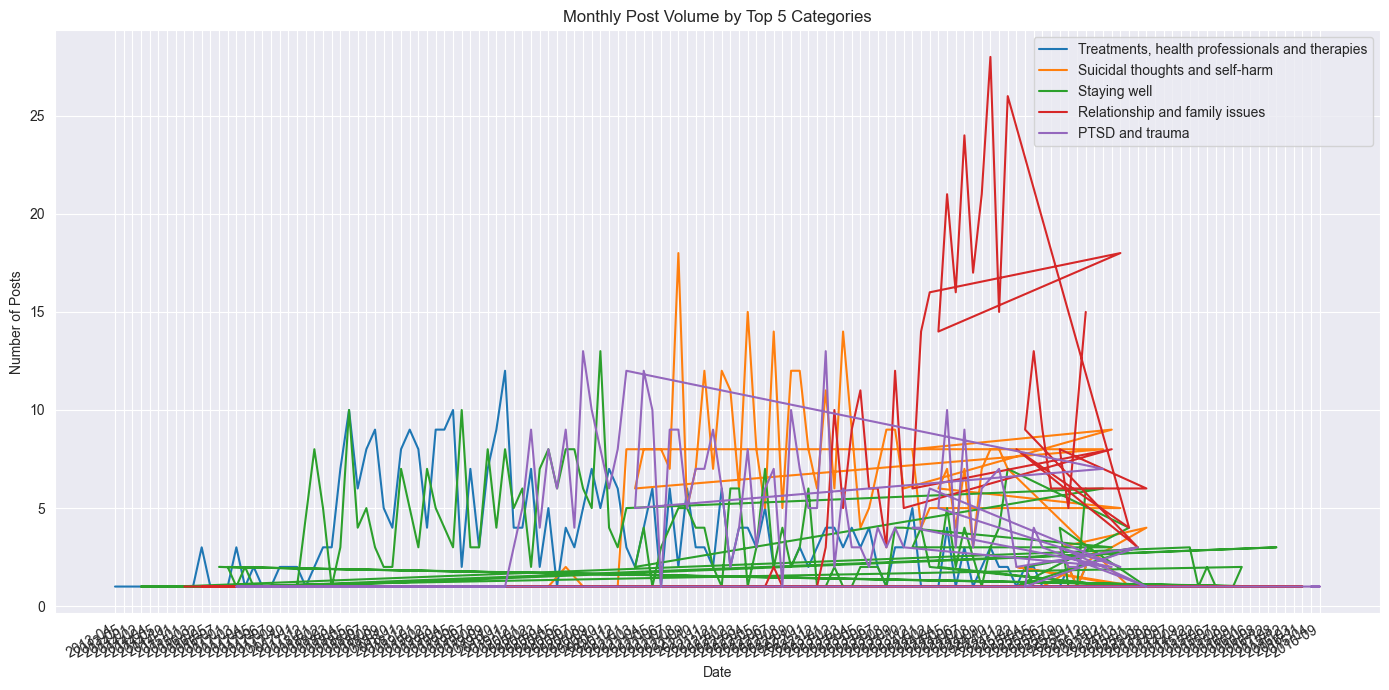

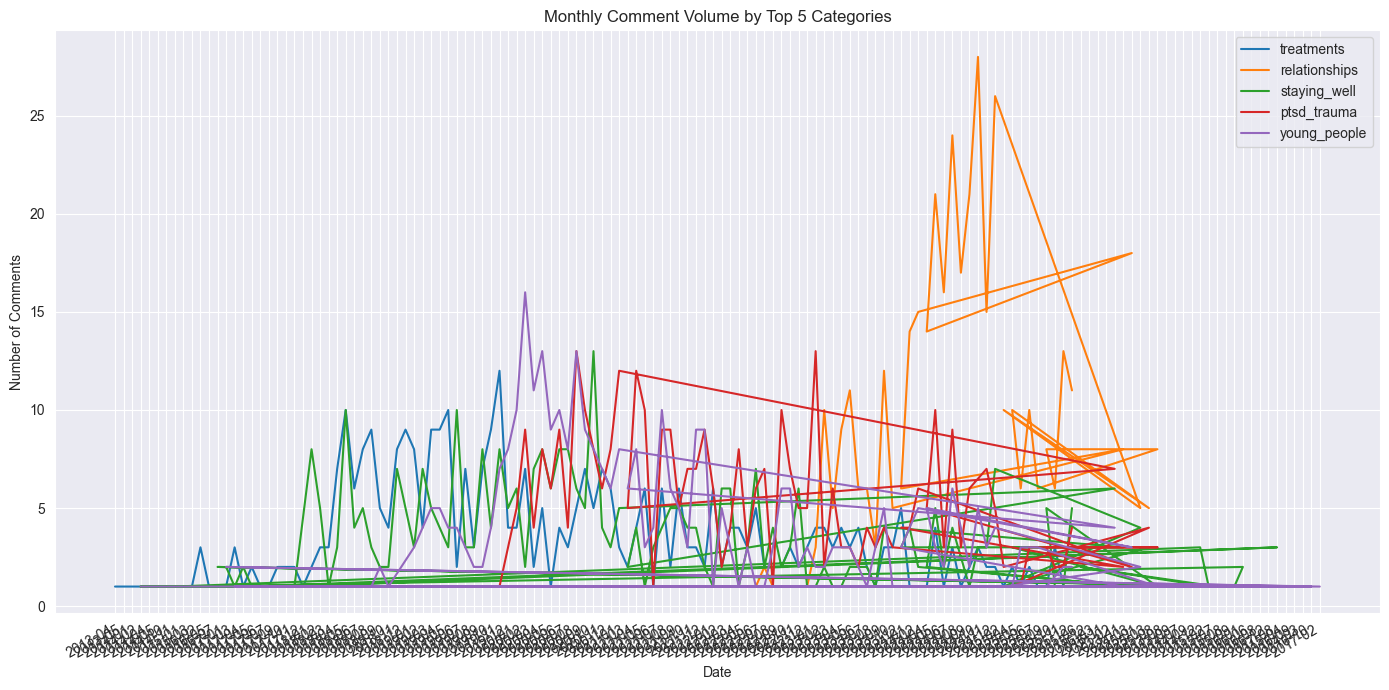

In [24]:
import matplotlib.pyplot as plt

# Find top 5 categories in posts
top5_cat_posts = bb_posts['Category'].value_counts().nlargest(5).index.tolist()

plt.figure(figsize=(14,7))
for cat in top5_cat_posts:
    monthly = bb_posts[bb_posts['Category'] == cat].groupby(bb_posts['Post Date'].dt.to_period('M')).size()
    plt.plot(monthly.index.astype(str), monthly.values, label=cat)
plt.title('Monthly Post Volume by Top 5 Categories')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=30, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Top 5 categories in comments
top5_cat_comments = bb_comments['Category'].value_counts().nlargest(5).index.tolist()

plt.figure(figsize=(14,7))
for cat in top5_cat_comments:
    monthly = bb_comments[bb_comments['Category'] == cat].groupby(bb_comments['Comment Date'].dt.to_period('M')).size()
    plt.plot(monthly.index.astype(str), monthly.values, label=cat)
plt.title('Monthly Comment Volume by Top 5 Categories')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=30, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

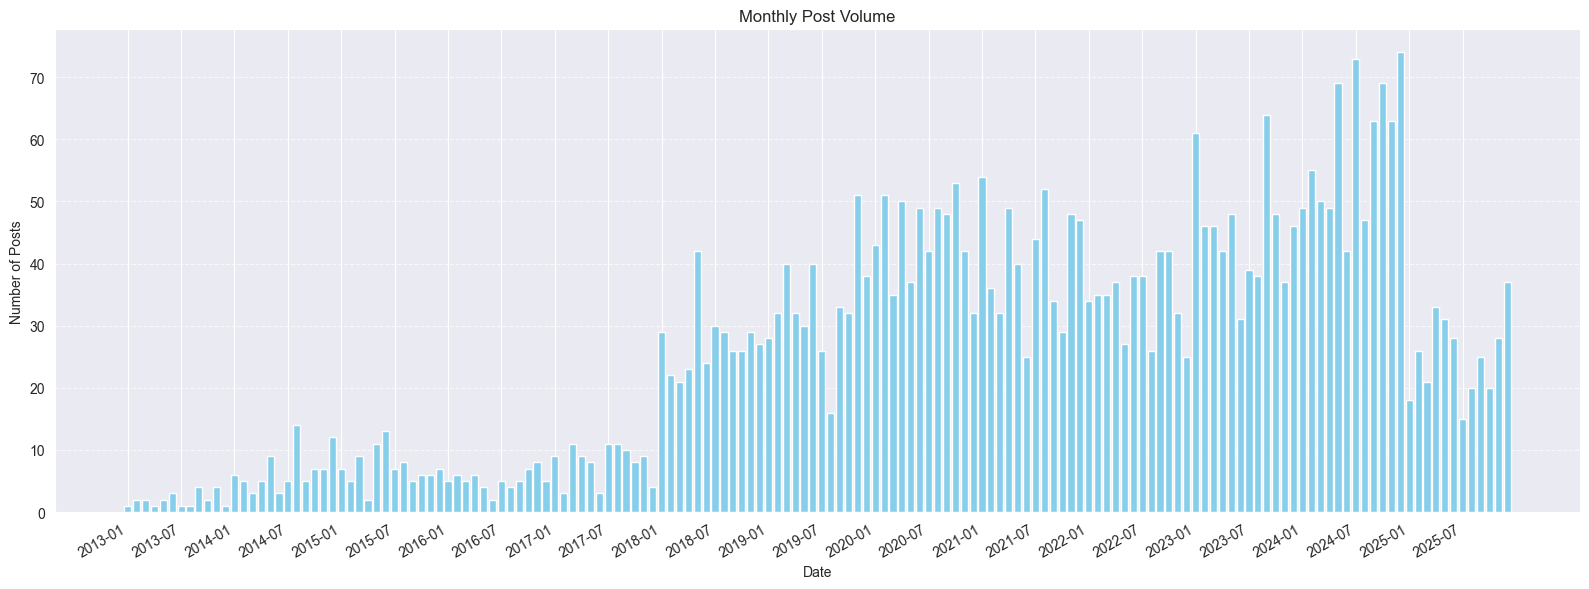

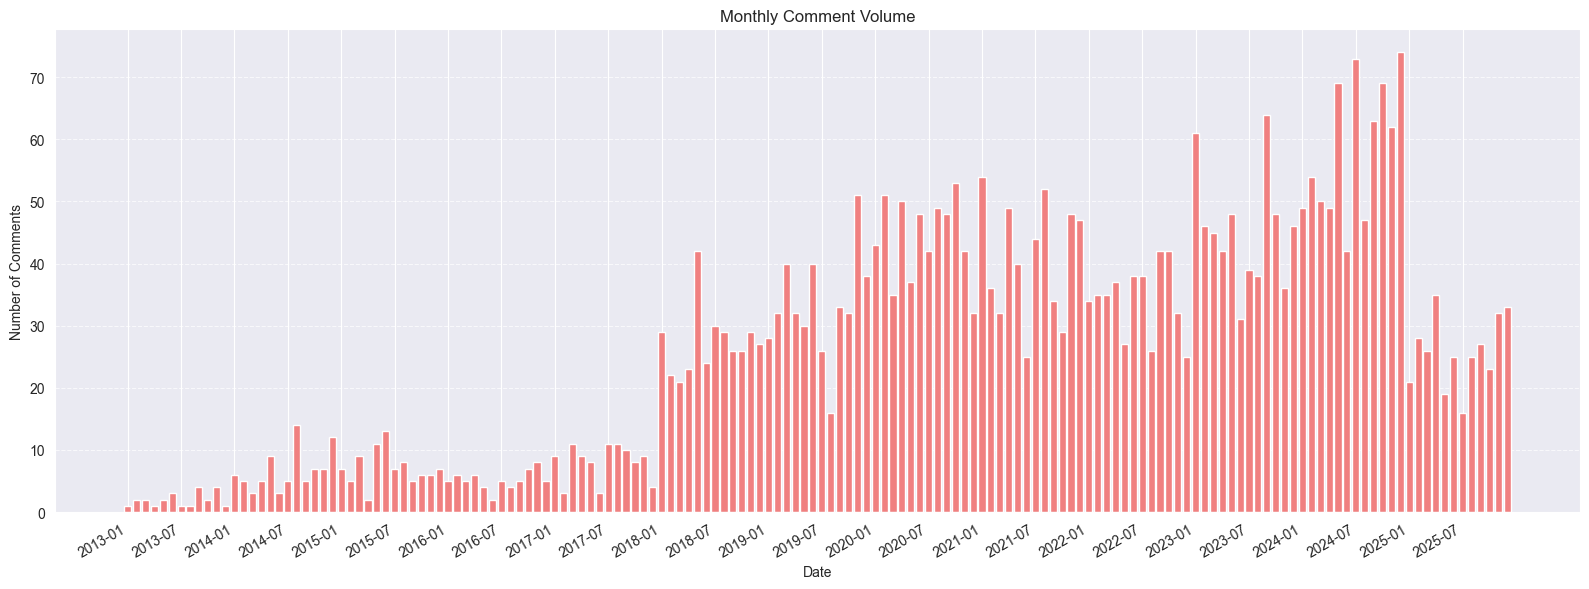

In [25]:
import matplotlib.pyplot as plt

def plot_monthly_volume_fixed(monthly_counts, title, ylabel, color, tick_interval=6):
    plt.figure(figsize=(16,6))
    x = monthly_counts.index.astype(str)
    y = monthly_counts.values

    plt.bar(x, y, color=color)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)

    # Show only every tick_interval-th tick
    ticks_to_show = list(range(0, len(x), tick_interval))
    plt.xticks(
        ticks_to_show,
        [x[i][:7] for i in ticks_to_show],  # Show only 'YYYY-MM'
        rotation=30, ha='right'
    )

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Usage for posts
plot_monthly_volume_fixed(posts_monthly, 'Monthly Post Volume', 'Number of Posts', 'skyblue', tick_interval=6)

# Usage for comments
plot_monthly_volume_fixed(comments_monthly, 'Monthly Comment Volume', 'Number of Comments', 'lightcoral', tick_interval=6)

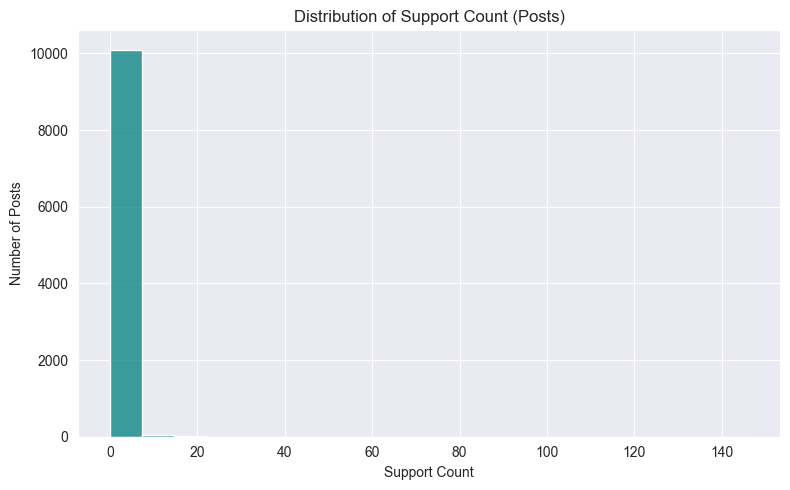

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(bb_posts['Support Count'], bins=20, kde=False, color='teal')
plt.title("Distribution of Support Count (Posts)")
plt.xlabel("Support Count")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()

In [28]:
!pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


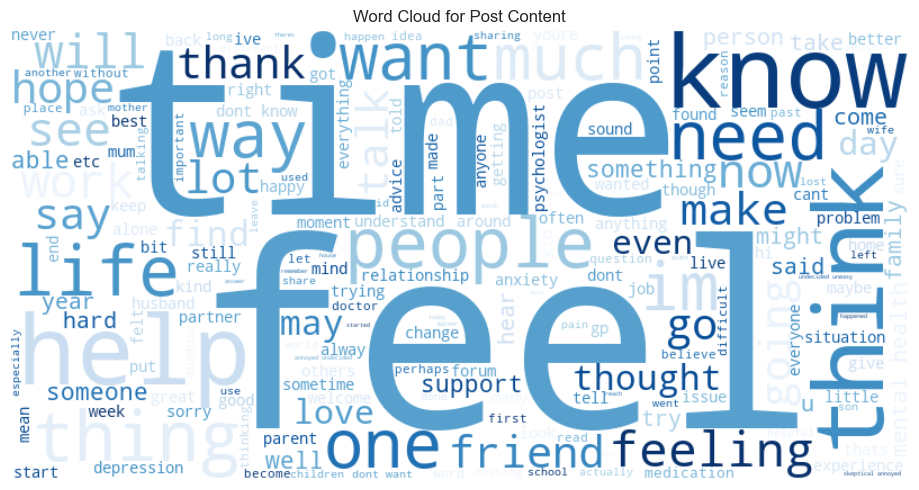

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all post content into one string
text_posts = " ".join(bb_posts['Post Content'].dropna().astype(str))

# Generate word cloud
wordcloud_posts = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text_posts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_posts, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Post Content')
plt.tight_layout()
plt.show()

In [31]:
!pip install textblob


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

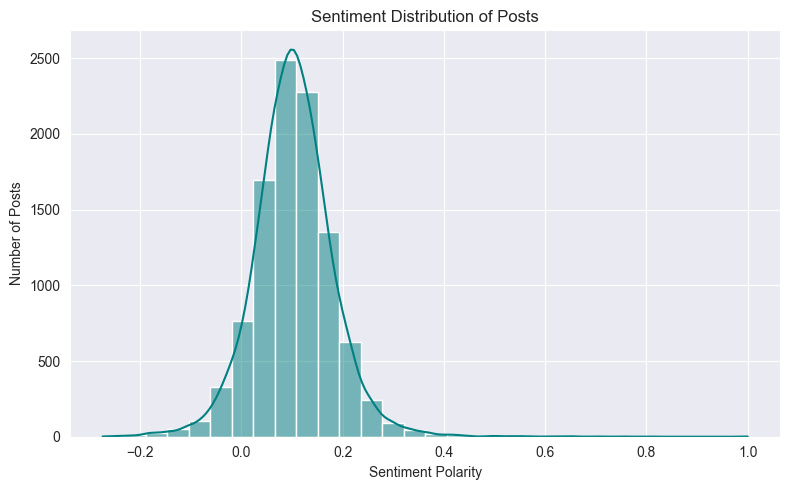

Average post sentiment: 0.10304450652234627


In [33]:
from textblob import TextBlob

# Compute sentiment polarity for each post
bb_posts['sentiment'] = bb_posts['Post Content'].dropna().apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(8,5))
sns.histplot(bb_posts['sentiment'], bins=30, kde=True, color='teal')
plt.title("Sentiment Distribution of Posts")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()

print("Average post sentiment:", bb_posts['sentiment'].mean())

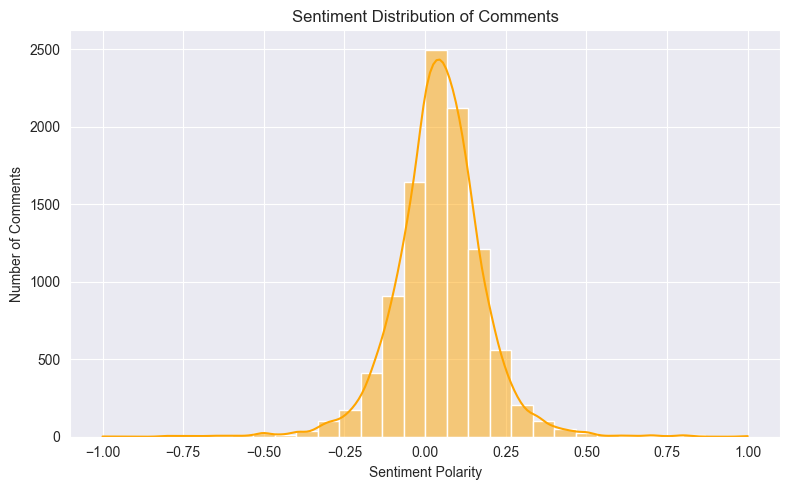

Average comment sentiment: 0.04423320566657324


In [34]:
bb_comments['sentiment'] = bb_comments['Comment Content'].dropna().apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(8,5))
sns.histplot(bb_comments['sentiment'], bins=30, kde=True, color='orange')
plt.title("Sentiment Distribution of Comments")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()

print("Average comment sentiment:", bb_comments['sentiment'].mean())

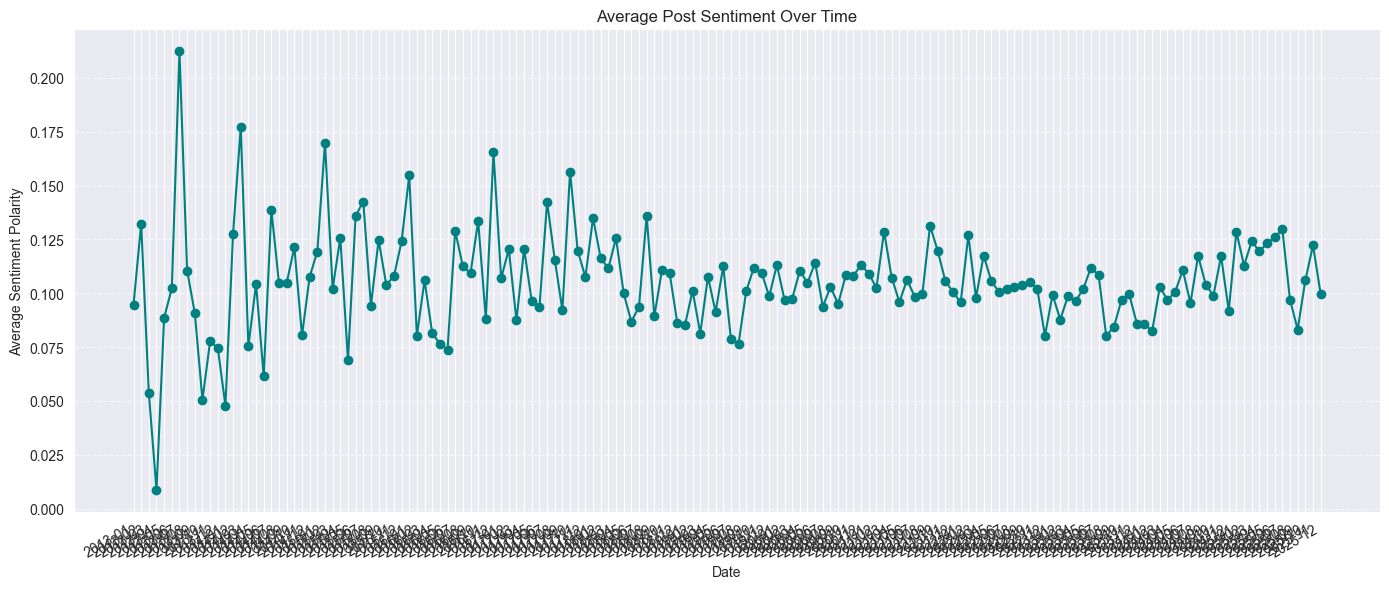

In [35]:
# Average sentiment per month for posts
monthly_post_sentiment = bb_posts.groupby(bb_posts['Post Date'].dt.to_period('M'))['sentiment'].mean()

plt.figure(figsize=(14,6))
plt.plot(monthly_post_sentiment.index.astype(str), monthly_post_sentiment.values, marker='o', color='teal')
plt.title("Average Post Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

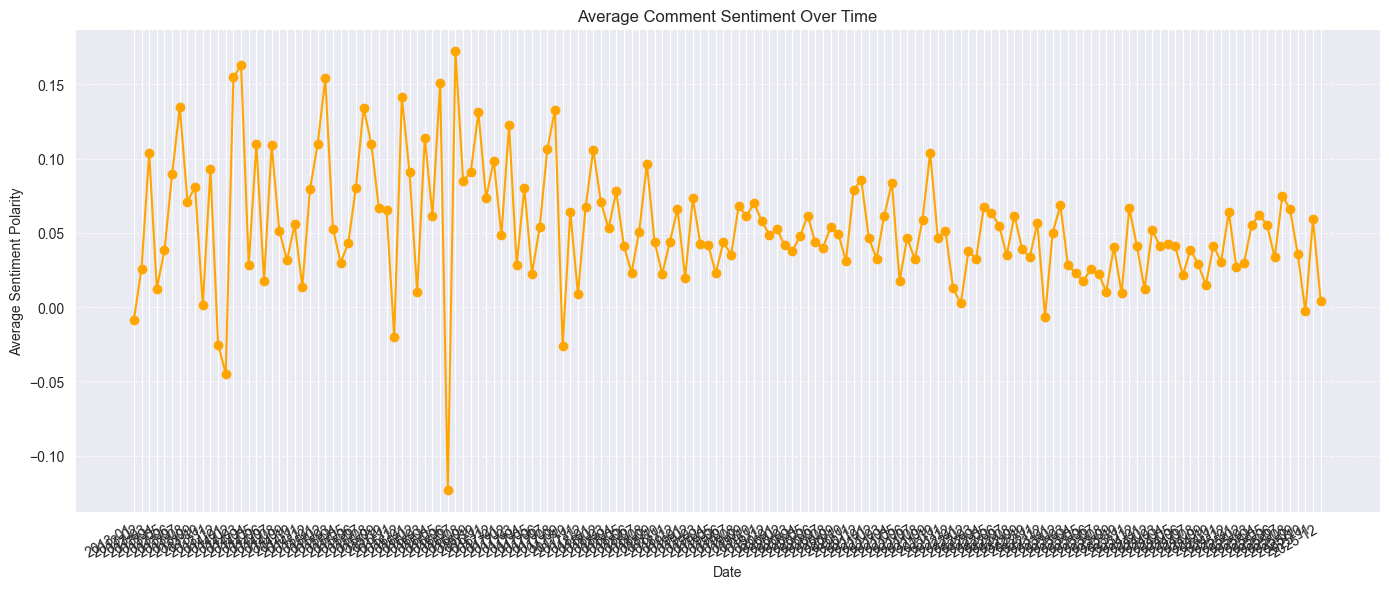

In [36]:
# Average sentiment per month for comments
monthly_comment_sentiment = bb_comments.groupby(bb_comments['Comment Date'].dt.to_period('M'))['sentiment'].mean()

plt.figure(figsize=(14,6))
plt.plot(monthly_comment_sentiment.index.astype(str), monthly_comment_sentiment.values, marker='o', color='orange')
plt.title("Average Comment Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

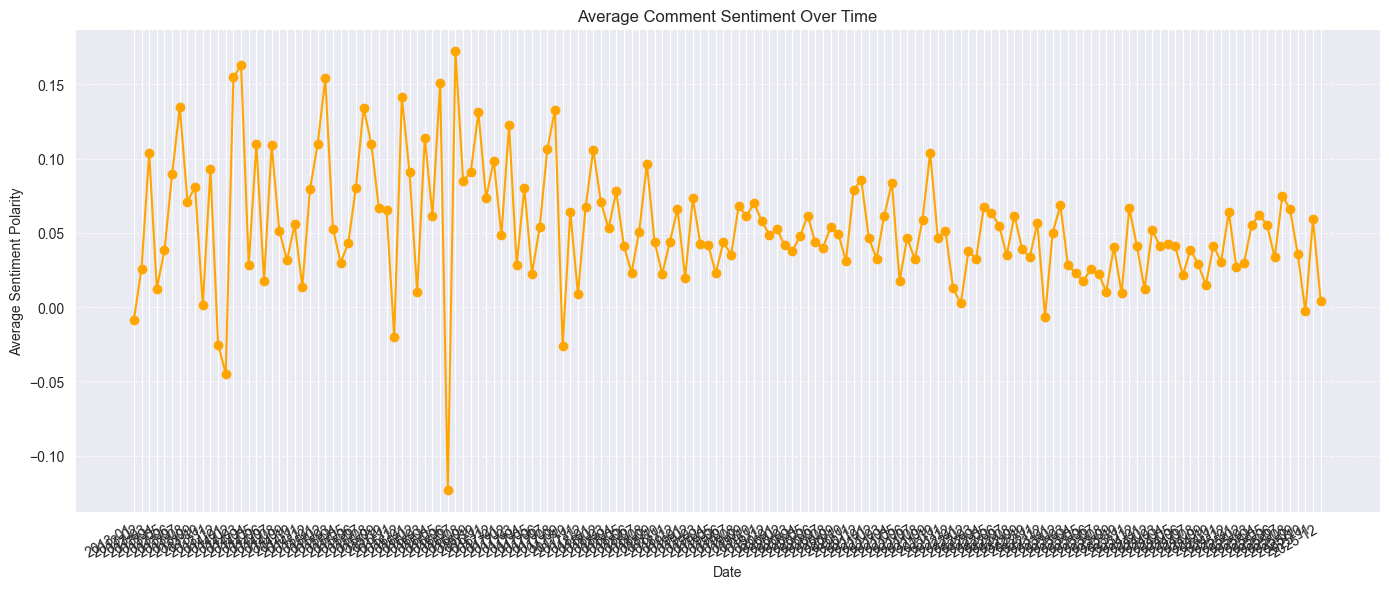

In [37]:
# Average sentiment per month for comments
monthly_comment_sentiment = bb_comments.groupby(bb_comments['Comment Date'].dt.to_period('M'))['sentiment'].mean()

plt.figure(figsize=(14,6))
plt.plot(monthly_comment_sentiment.index.astype(str), monthly_comment_sentiment.values, marker='o', color='orange')
plt.title("Average Comment Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Polarity")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_10232\1045437776.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_support_post_cat.values, y=avg_support_post_cat.index, palette='viridis')


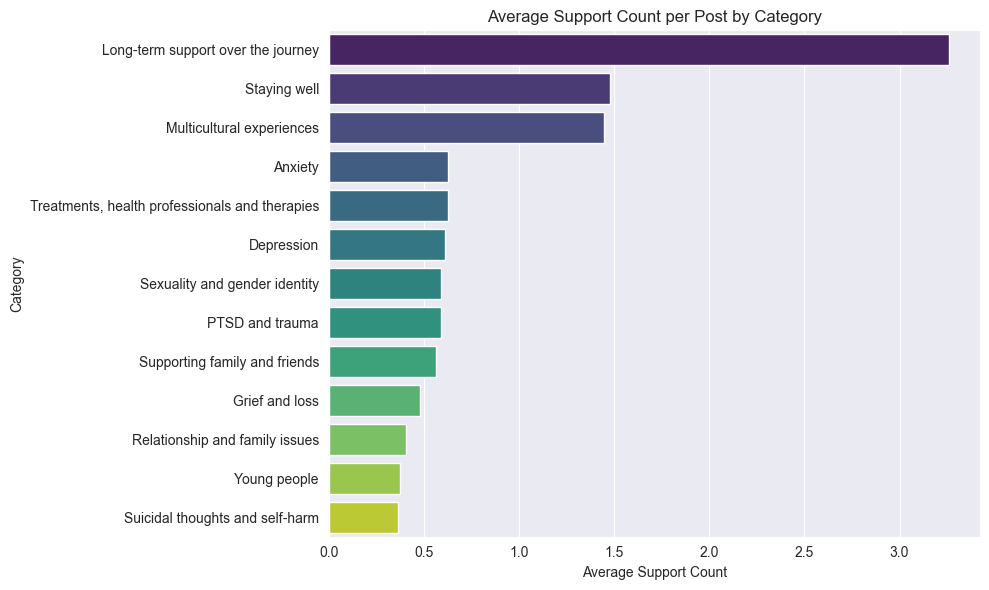

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average support per category for posts
avg_support_post_cat = bb_posts.groupby('Category')['Support Count'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_support_post_cat.values, y=avg_support_post_cat.index, palette='viridis')
plt.title("Average Support Count per Post by Category")
plt.xlabel("Average Support Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

C:\Users\aipro\AppData\Local\Temp\ipykernel_10232\3856654585.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_support_comment_cat.values, y=avg_support_comment_cat.index, palette='magma')


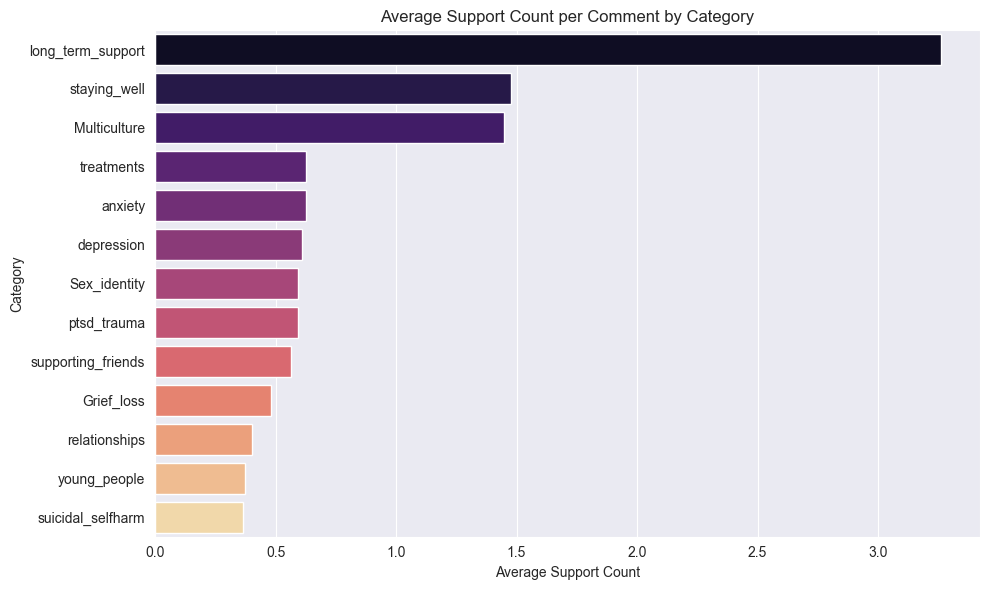

In [40]:
# Calculate average support per category for comments
avg_support_comment_cat = bb_comments.groupby('Category')['Comment Support'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_support_comment_cat.values, y=avg_support_comment_cat.index, palette='magma')
plt.title("Average Support Count per Comment by Category")
plt.xlabel("Average Support Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

In [41]:
# Top 10 posts with highest support count
top_posts = bb_posts.sort_values(by='Support Count', ascending=False).head(10)

# Display key columns
print(top_posts[['Post Author', 'Post Content', 'Support Count', 'Category', 'Post Date']])

                    Post Author  \
8904                    Chris_B   
7661                    Carmela   
7829  beyondblue_Online_Communi   
8849                     Dr_Kim   
2095                      Kazzl   
6912             romantic_thi3f   
726                white knight   
6096                   blondguy   
9623             romantic_thi3f   
6000                    Doolhof   

                                           Post Content  Support Count  \
8904  hi everyone,this is a thread for asking questi...            146   
7661  this list has been compiled from experiences s...            123   
7829  new to the supporting family and friends forum...             84   
8849  hi all,i have been asked on my thoughts about ...             78   
2095  are your moods are like an elevator with no co...             47   
6912  hi everyone,this is not an easy thread to make...             35   
726   its a very common topic on this forum, anxiety...             33   
6096  hello everybody 

In [42]:
# Top 10 comments with highest support count
top_comments = bb_comments.sort_values(by='Comment Support', ascending=False).head(10)

# Display key columns
print(top_comments[['Comment Author', 'Comment Content', 'Comment Support', 'Category', 'Comment Date']])

                 Comment Author  \
8896                    Chris_B   
7654                    Carmela   
7821  beyondblue_Online_Communi   
8841                     Dr_Kim   
2093                      Kazzl   
6904             romantic_thi3f   
727                white knight   
6090                   blondguy   
5996                    Doolhof   
9615             romantic_thi3f   

                                        Comment Content  Comment Support  \
8896  hi everyone,this is a thread for asking questi...              146   
7654  this list has been compiled from experiences s...              123   
7821  new to the supporting family and friends forum...               84   
8841  hi all,i have been asked on my thoughts about ...               78   
2093  are your moods are like an elevator with no co...               47   
6904  hi everyone,this is not an easy thread to make...               35   
727   its a very common topic on this forum, anxiety...               33   
6090  

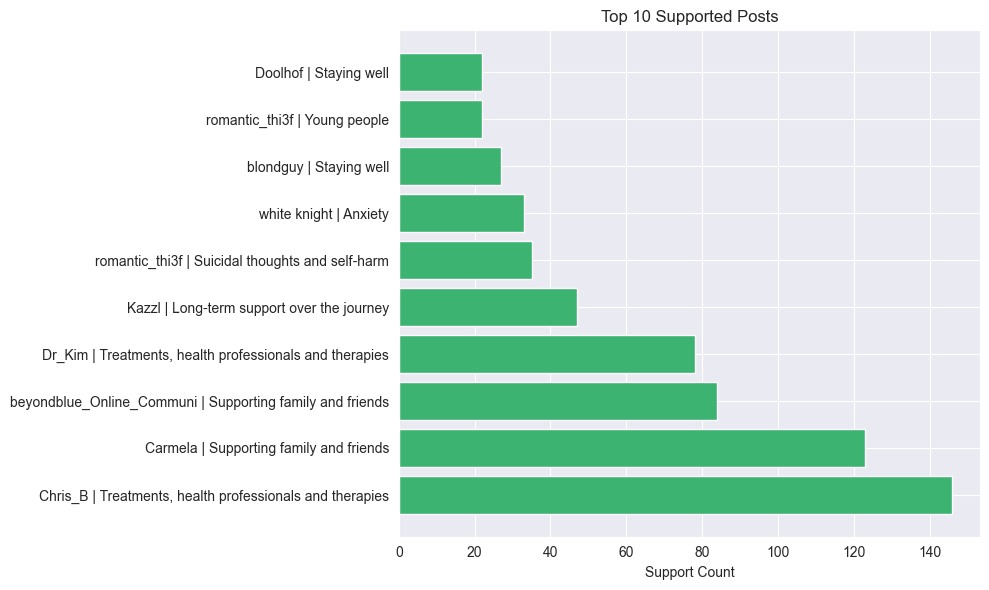

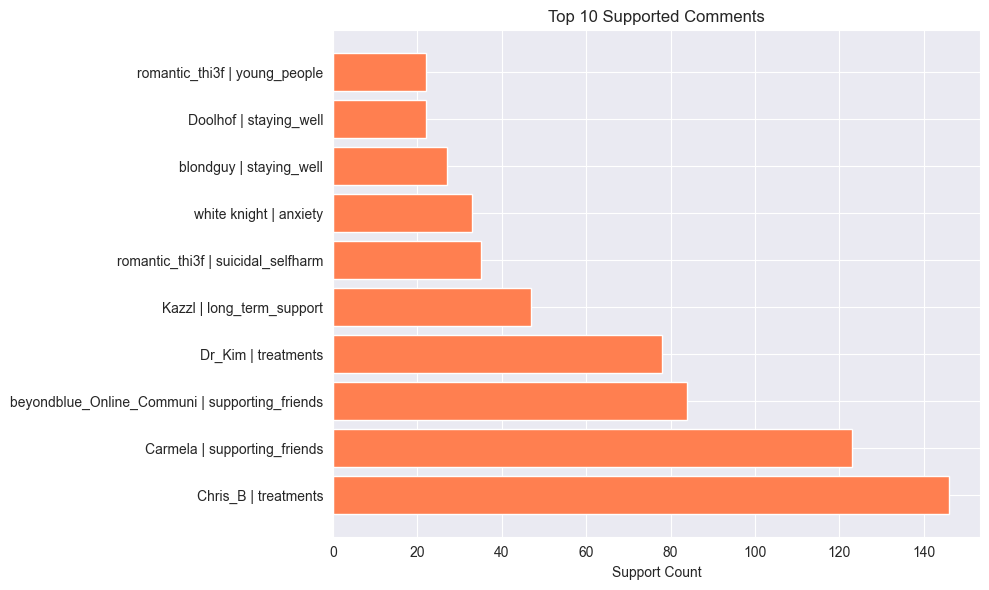

In [43]:
import matplotlib.pyplot as plt

# Posts
plt.figure(figsize=(10,6))
plt.barh(top_posts['Post Author'] + ' | ' + top_posts['Category'], top_posts['Support Count'], color='mediumseagreen')
plt.xlabel("Support Count")
plt.title("Top 10 Supported Posts")
plt.tight_layout()
plt.show()

# Comments
plt.figure(figsize=(10,6))
plt.barh(top_comments['Comment Author'] + ' | ' + top_comments['Category'], top_comments['Comment Support'], color='coral')
plt.xlabel("Support Count")
plt.title("Top 10 Supported Comments")
plt.tight_layout()
plt.show()

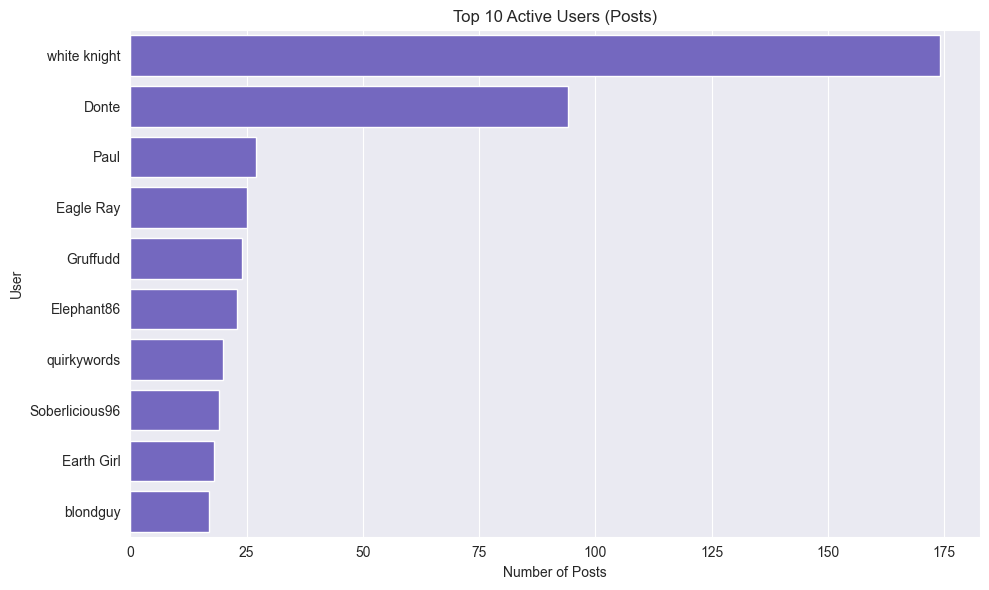

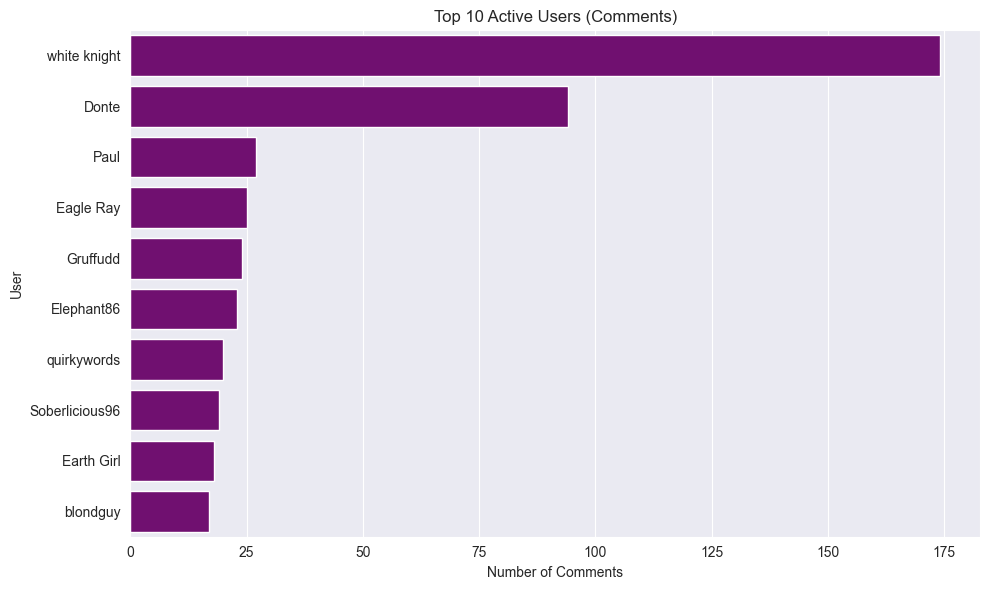

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 users by number of posts
top_post_authors = bb_posts['Post Author'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_post_authors.values, y=top_post_authors.index, color='slateblue')
plt.title("Top 10 Active Users (Posts)")
plt.xlabel("Number of Posts")
plt.ylabel("User")
plt.tight_layout()
plt.show()

# Top 10 users by number of comments
top_comment_authors = bb_comments['Comment Author'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_comment_authors.values, y=top_comment_authors.index, color='purple')
plt.title("Top 10 Active Users (Comments)")
plt.xlabel("Number of Comments")
plt.ylabel("User")
plt.tight_layout()
plt.show()

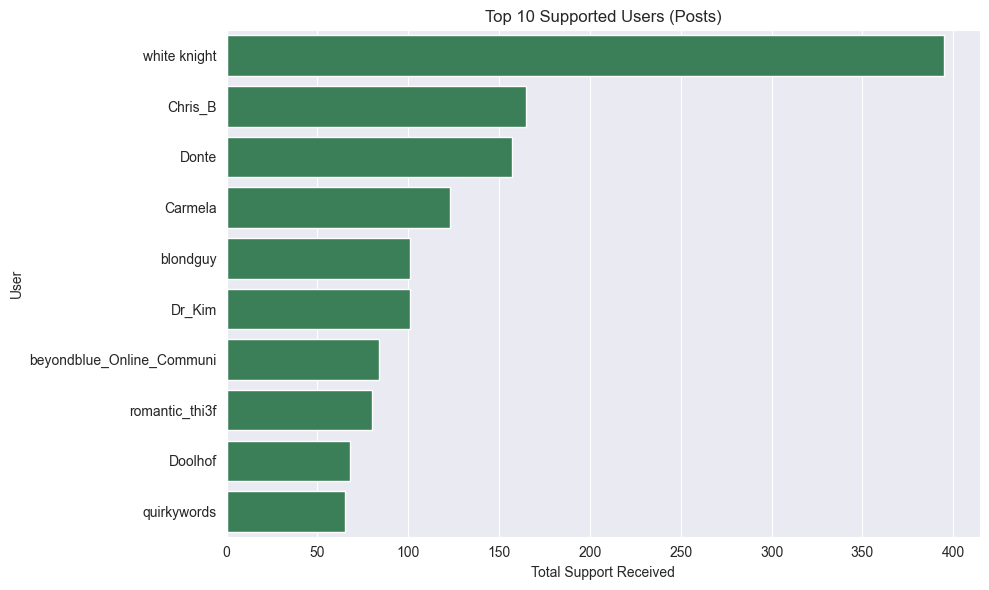

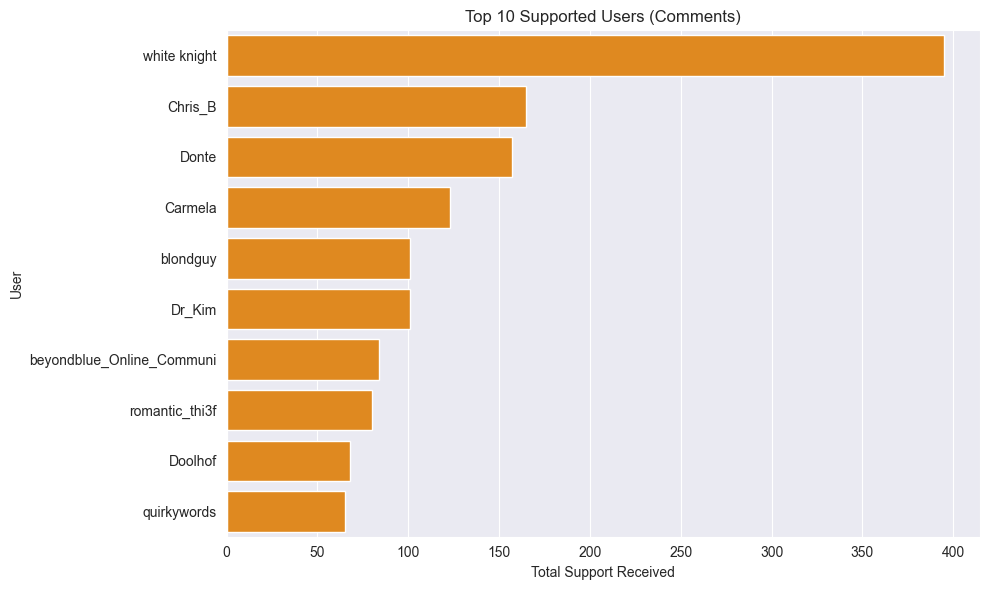

In [45]:
# Top 10 users by total support count in posts
support_post_authors = bb_posts.groupby('Post Author')['Support Count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=support_post_authors.values, y=support_post_authors.index, color='seagreen')
plt.title("Top 10 Supported Users (Posts)")
plt.xlabel("Total Support Received")
plt.ylabel("User")
plt.tight_layout()
plt.show()

# Top 10 users by total support count in comments
support_comment_authors = bb_comments.groupby('Comment Author')['Comment Support'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=support_comment_authors.values, y=support_comment_authors.index, color='darkorange')
plt.title("Top 10 Supported Users (Comments)")
plt.xlabel("Total Support Received")
plt.ylabel("User")
plt.tight_layout()
plt.show()

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

# Example: Edges from comment author to post author
edges = list(zip(bb_comments['Comment Author'], bb_comments['Post Author']))

# Create the directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Draw the network (top 50 nodes for clarity)
plt.figure(figsize=(12,12))
subgraph = G.subgraph(list(dict(G.degree).keys())[:50])
pos = nx.spring_layout(subgraph, k=0.5)
nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color='lightblue', arrowsize=10)
plt.title("User Reply Network (Top 50 Active Users)")
plt.tight_layout()
plt.show()

KeyError: 'Post Author'

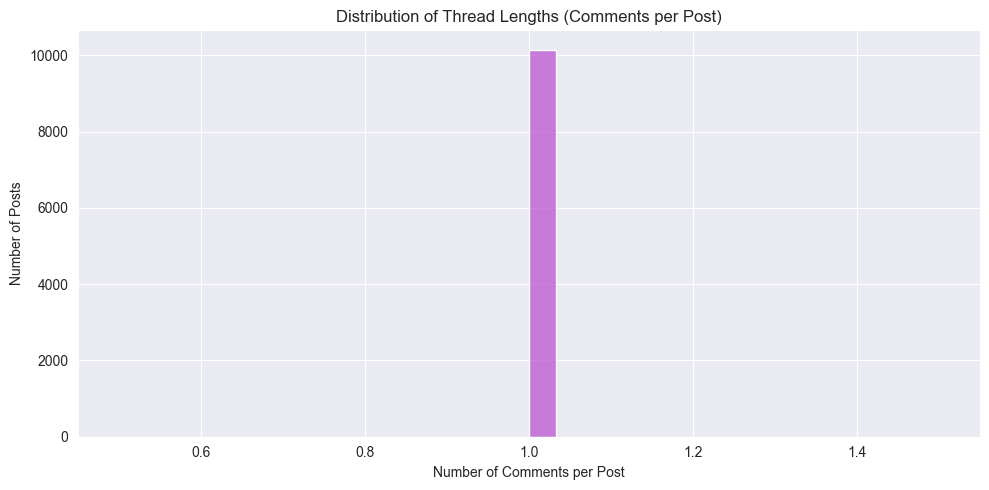

Average thread length: 1.0
Median thread length: 1.0


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate number of comments per post
comments_per_post = bb_comments.groupby('Post ID').size()

plt.figure(figsize=(10,5))
sns.histplot(comments_per_post, bins=30, color='mediumorchid')
plt.title("Distribution of Thread Lengths (Comments per Post)")
plt.xlabel("Number of Comments per Post")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()

print("Average thread length:", comments_per_post.mean())
print("Median thread length:", comments_per_post.median())

In [15]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(reddit_posts['num_comments'], bins=30, color='mediumslateblue', edgecolor='black')
plt.title('Distribution of Comments per Reddit Post')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()

NameError: name 'reddit_posts' is not defined

<Figure size 800x600 with 0 Axes>

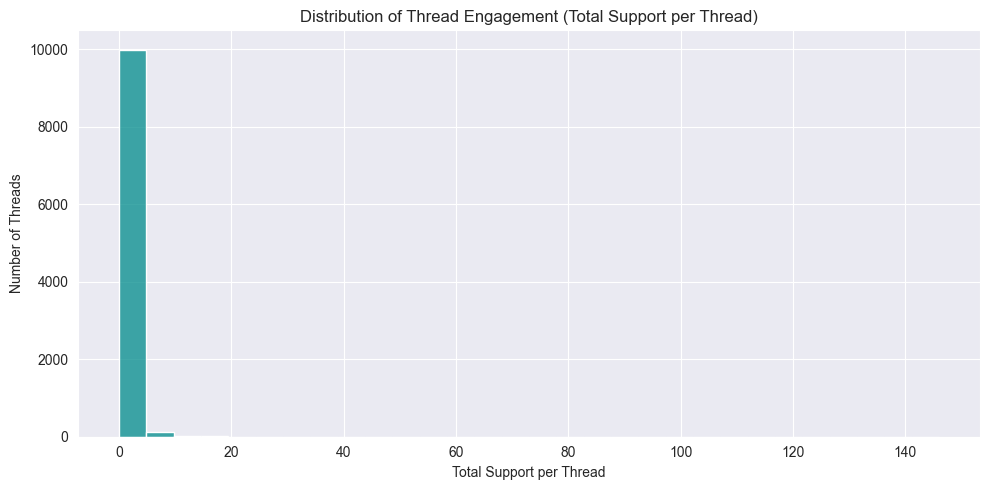

Average thread support: 0.646461659767396
Median thread support: 0.0


In [48]:
# Calculate total support per thread (sum of comment supports)
support_per_thread = bb_comments.groupby('Post ID')['Comment Support'].sum()

plt.figure(figsize=(10,5))
sns.histplot(support_per_thread, bins=30, color='darkcyan')
plt.title("Distribution of Thread Engagement (Total Support per Thread)")
plt.xlabel("Total Support per Thread")
plt.ylabel("Number of Threads")
plt.tight_layout()
plt.show()

print("Average thread support:", support_per_thread.mean())
print("Median thread support:", support_per_thread.median())

Beyond Blue: Raw vs After-cleaning Counts
       Type  Raw Count  Cleaned Count
0     Posts      20003          10155
1  Comments      10155          10146


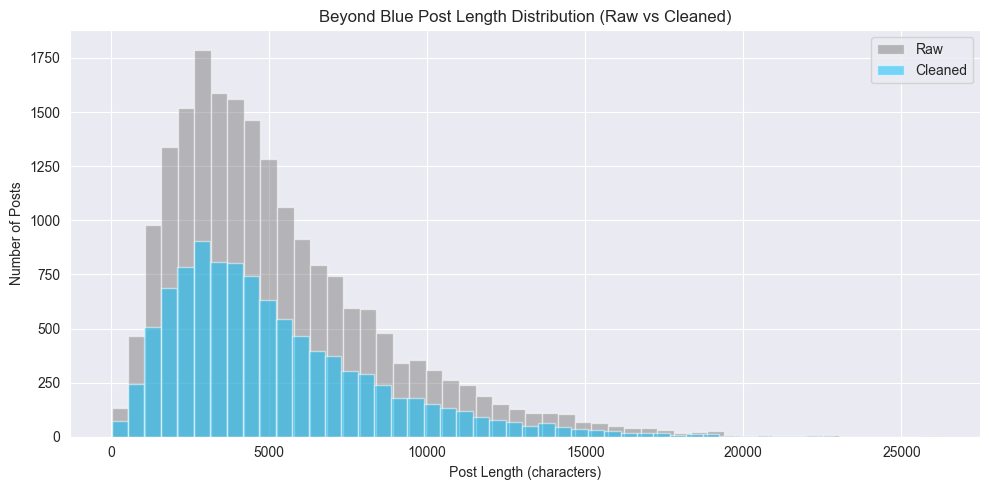

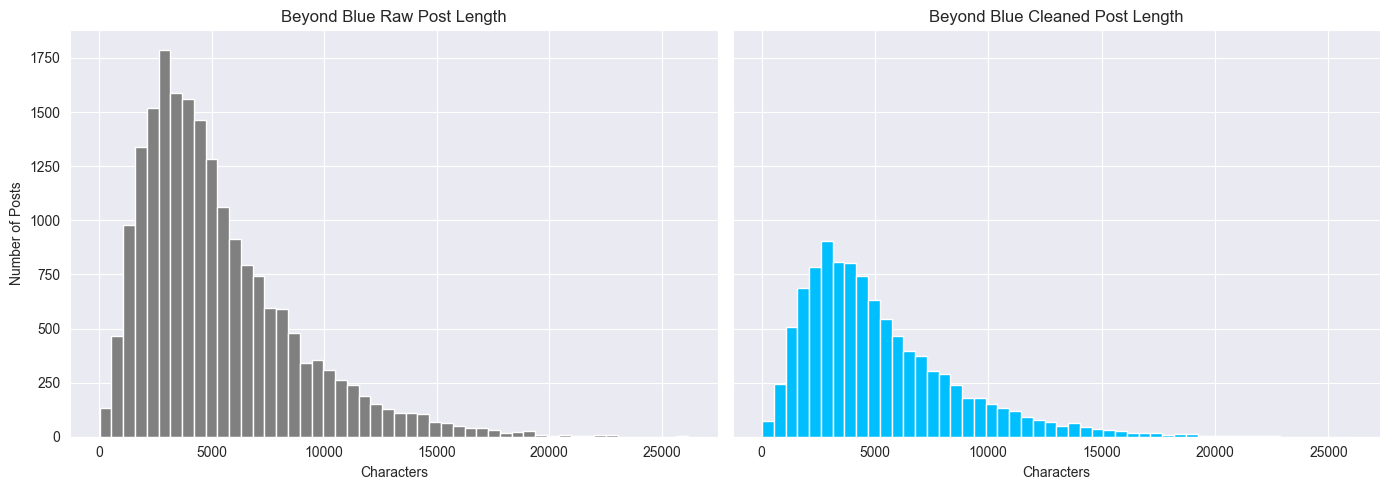

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# ----- LOAD RAW DATA -----
bb_data_path = '../Data/Beyond Blue/'
posts_files = glob.glob(os.path.join(bb_data_path, 'posts_*.csv'))
comments_files = glob.glob(os.path.join(bb_data_path, 'comments_*.csv'))

bb_posts_raw = pd.concat([pd.read_csv(f) for f in posts_files], ignore_index=True)
bb_comments_raw = pd.concat([pd.read_csv(f) for f in comments_files], ignore_index=True)

# ----- LOAD CLEANED DATA -----
bb_posts_clean = pd.read_csv("bb_posts_clean_final.csv")
bb_comments_clean = pd.read_csv("bb_comments_clean_final.csv")

# ----- COUNTS TABLE -----
counts_df = pd.DataFrame({
    'Type': ['Posts', 'Comments'],
    'Raw Count': [len(bb_posts_raw), len(bb_comments_raw)],
    'Cleaned Count': [len(bb_posts_clean), len(bb_comments_clean)]
})
print("Beyond Blue: Raw vs After-cleaning Counts")
print(counts_df)
counts_df.to_csv("beyond_blue_raw_vs_cleaned_counts.csv", index=False)

# ----- HISTOGRAMS: POST LENGTH DISTRIBUTION -----
# Use 'Post Content' column
bb_posts_raw['post_length'] = bb_posts_raw['Post Content'].astype(str).str.len()
bb_posts_clean['post_length'] = bb_posts_clean['Post Content'].astype(str).str.len()

# Overlay plot
plt.figure(figsize=(10,5))
plt.hist(bb_posts_raw['post_length'], bins=50, alpha=0.5, label='Raw', color='gray')
plt.hist(bb_posts_clean['post_length'], bins=50, alpha=0.5, label='Cleaned', color='deepskyblue')
plt.title('Beyond Blue Post Length Distribution (Raw vs Cleaned)')
plt.xlabel('Post Length (characters)')
plt.ylabel('Number of Posts')
plt.legend()
plt.tight_layout()
plt.show()

# Side-by-side plot
fig, axes = plt.subplots(1,2, figsize=(14,5), sharey=True)
axes[0].hist(bb_posts_raw['post_length'], bins=50, color='gray')
axes[0].set_title('Beyond Blue Raw Post Length')
axes[0].set_xlabel('Characters')
axes[0].set_ylabel('Number of Posts')
axes[1].hist(bb_posts_clean['post_length'], bins=50, color='deepskyblue')
axes[1].set_title('Beyond Blue Cleaned Post Length')
axes[1].set_xlabel('Characters')
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd

# Load raw and cleaned Beyond Blue posts
bb_posts_raw = pd.concat([pd.read_csv(f) for f in posts_files], ignore_index=True)  # your raw loading method
bb_posts_clean = pd.read_csv('bb_posts_clean_final.csv')

In [27]:
bb_posts_raw['post_length'] = bb_posts_raw['Post Content'].astype(str).str.len()
bb_posts_clean['post_length'] = bb_posts_clean['Post Content'].astype(str).str.len()

In [30]:
import pandas as pd
import glob
import os

# Load Beyond Blue raw data
bb_data_path = '../Data/Beyond Blue/'
posts_files = glob.glob(os.path.join(bb_data_path, 'posts_*.csv'))
comments_files = glob.glob(os.path.join(bb_data_path, 'comments_*.csv'))

bb_posts_raw = pd.concat([pd.read_csv(f) for f in posts_files], ignore_index=True)
bb_comments_raw = pd.concat([pd.read_csv(f) for f in comments_files], ignore_index=True)

# Load Beyond Blue cleaned data
bb_posts_clean = pd.read_csv("bb_posts_clean_final.csv")
bb_comments_clean = pd.read_csv("bb_comments_clean_final.csv")

# Make the counts table
bb_counts = pd.DataFrame({
    'Type': ['Posts', 'Comments'],
    'Raw Count': [len(bb_posts_raw), len(bb_comments_raw)],
    'Cleaned Count': [len(bb_posts_clean), len(bb_comments_clean)]
})
print("Beyond Blue: Raw vs After-cleaning Counts")
print(bb_counts)

Beyond Blue: Raw vs After-cleaning Counts
       Type  Raw Count  Cleaned Count
0     Posts      20003          10155
1  Comments      10155          10146


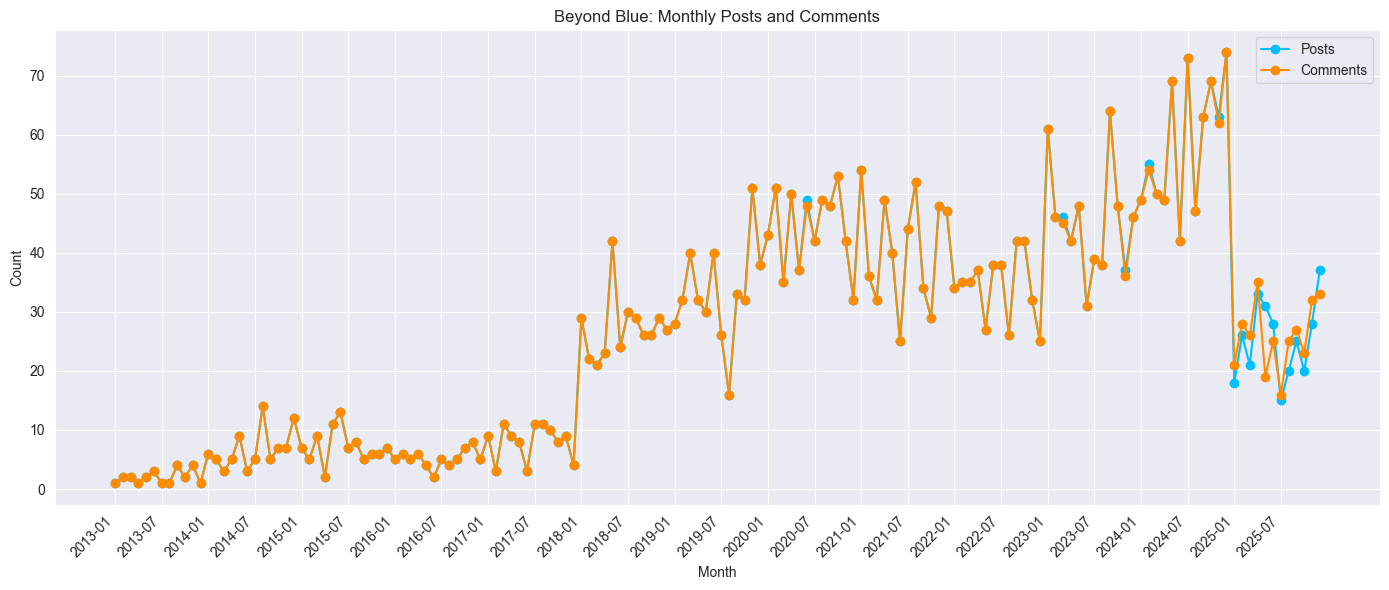

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming posts_monthly and comments_monthly are already sorted by index
N = 6  # Show every 6th month label (adjust to 12 for yearly ticks)

months = posts_monthly.index.astype(str)
xticks_pos = range(0, len(months), N)

plt.figure(figsize=(14,6))
plt.plot(months, posts_monthly.values, label='Posts', marker='o', color='deepskyblue')
plt.plot(months, comments_monthly.values, label='Comments', marker='o', color='darkorange')
plt.title('Beyond Blue: Monthly Posts and Comments')
plt.xlabel('Month')
plt.ylabel('Count')

plt.xticks(ticks=xticks_pos, labels=[months[i] for i in xticks_pos], rotation=45, ha='right')  # Show only selected ticks
plt.legend()
plt.tight_layout()
plt.show()